In [1]:
import numpy as np
import pandas as pd



In [10]:
import json

import numpy as np

def get_record(i):

    path = f"records/{i}.json"
    with open(path,'r') as f:
        D = json.load(f)
    return D

In [32]:
Cartesian = {
    "max_population_size": [1000, 2000, 5000, 10000],
    "surv_bound_lo": [0, 0.5, 0.9],
    "repr_bound_hi": [0.5, 0.9],
    "mutation_ratio": [1.5, 1, 0.1, 0.01],
    "bottleneck_size": [100, 900],
}

cycle_num = 3000

vals = np.zeros(shape=[len(v) for v in Cartesian.values()]) + 2

coordl = []

for i in range(192):
    D = get_record(i)
    conf = D['config']
    coords = [
        v.index(conf[k])
        for k,v in Cartesian.items()]

    if coords in coordl:
        print(coords,'already in coordl')

    coordl.append(coords)


    val = len(D['data']['ages'])
    print(i, val)

    vals[coords[0],coords[1],coords[2],coords[3],coords[4]] = val


0 1155
1 3000
2 3000
3 3000
4 96
5 958
6 2251
7 3000
8 3000
9 3000
10 3000
11 3000
12 3000
13 3000
14 1226
15 1505
16 3000
17 50
18 3000
19 676
20 3000
21 1298
22 1955
23 1092
24 953
25 613
26 3000
27 191
28 3000
29 452
30 1731
31 3000
32 776
33 2348
34 3000
35 3000
36 283
37 3000
38 3000
39 1277
40 796
41 1429
42 387
43 1273
44 597
45 1493
46 1378
47 1243
48 564
49 2679
50 2483
51 1903
52 2471
53 2570
54 246
55 318
56 51
57 2374
58 3000
59 712
60 3000
61 2630
62 3000
63 1533
64 309
65 3000
66 2345
67 412
68 669
69 419
70 196
71 50
72 1167
73 501
74 3000
75 3000
76 3000
77 3000
78 2548
79 3000
80 3000
81 864
82 3000
83 3000
84 2538
85 50
86 2104
87 3000
88 1330
89 2078
90 3000
91 2233
92 576
93 3000
94 632
95 1286
96 1432
97 3000
98 308
99 1611
100 3000
101 3000
102 951
103 3000
104 3000
105 1514
106 292
107 1317
108 2189
109 537
110 3000
111 3000
112 1354
113 2916
114 3000
115 657
116 3000
117 3000
118 396
119 2204
120 3000
121 716
122 3000
123 3000
124 557
125 3000
126 3000
127 346
1

In [33]:
import pickle

with open('records-treadmillreal-survtime','wb') as f:
    pickle.dump(vals,f)

In [34]:
with open('records-treadmillreal-survtime','rb') as f:
    x = pickle.load(f)

In [ ]:
# Cartesian = {
#     "max_population_size": [1000, 2000, 5000, 10000],
#     "surv_bound_lo": [0, 0.5, 0.9],
#     "repr_bound_hi": [0.5, 0.9],
#     "mutation_ratio": [1.5, 1, 0.1, 0.01],
#     "bottleneck_size": [100, 900],
# }

In [36]:
y = x > 2000
axes = set(range(len(x.shape)))
for axis in axes:
    for ax2 in axes:
        if axis == ax2:
            continue
        keys = list(Cartesian.keys())
        print(keys[axis],keys[ax2])
        l = axes - {axis} - {ax2}
        s = np.sum(y,axis=tuple(l))
        print(s)

max_population_size surv_bound_lo
[[11  6  5]
 [ 9  8 10]
 [ 8 10  6]
 [10 10  5]]
max_population_size repr_bound_hi
[[13  9]
 [12 15]
 [12 12]
 [13 12]]
max_population_size mutation_ratio
[[5 8 5 4]
 [5 9 8 5]
 [4 5 9 6]
 [5 5 7 8]]
max_population_size bottleneck_size
[[12 10]
 [14 13]
 [13 11]
 [11 14]]
surv_bound_lo max_population_size
[[11  6  5]
 [ 9  8 10]
 [ 8 10  6]
 [10 10  5]]
surv_bound_lo repr_bound_hi
[[16 22]
 [16 18]
 [18  8]]
surv_bound_lo mutation_ratio
[[ 9  8 13  8]
 [ 6 11  9  8]
 [ 4  8  7  7]]
surv_bound_lo bottleneck_size
[[19 19]
 [18 16]
 [13 13]]
repr_bound_hi max_population_size
[[13  9]
 [12 15]
 [12 12]
 [13 12]]
repr_bound_hi surv_bound_lo
[[16 22]
 [16 18]
 [18  8]]
repr_bound_hi mutation_ratio
[[10 13 15 12]
 [ 9 14 14 11]]
repr_bound_hi bottleneck_size
[[23 27]
 [27 21]]
mutation_ratio max_population_size
[[5 8 5 4]
 [5 9 8 5]
 [4 5 9 6]
 [5 5 7 8]]
mutation_ratio surv_bound_lo
[[ 9  8 13  8]
 [ 6 11  9  8]
 [ 4  8  7  7]]
mutation_ratio repr_bound_hi
[

In [52]:
vars = []




y = x < 2000
axes = set(range(len(x.shape)))
for axis in axes:
    keys = list(Cartesian.keys())
    print(keys[axis])
    l = axes - {axis}
    s = np.sum(y,axis=tuple(l))
    print(s)
    print(np.sqrt(np.var(s)))
    vars.append(list(np.sqrt(np.var(s))))

data = list(zip(*vars))

plt.plot(data)

max_population_size
[26 21 24 23]
1.8027756377319946


TypeError: 'numpy.float64' object is not iterable

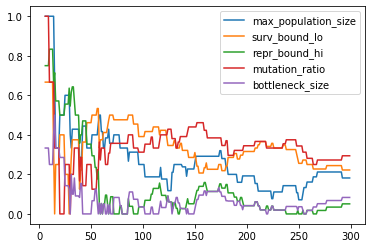

In [71]:
import matplotlib.pyplot as plt

VARS = []



for limit in range(0,3000,10):
    y = x < limit

    axes = set(range(len(x.shape)))
    vars = []
    for axis in axes:
        keys = list(Cartesian.keys())
        # print(keys[axis])
        l = axes - {axis}
        s = np.sum(y,axis=tuple(l))
        # print(s)
        # print(np.sqrt(np.var(s)))
        # vars.append([max(s),min(s)])
        vars.append((max(s)-min(s))/max(s))
    VARS.append(vars)

# data = list(zip(*VARS))
# print(keys)
for l,k in zip(list(zip(*VARS)),keys):
    plt.plot(l,label=k)
plt.legend()
plt.show()

In [17]:
import itertools

Cartesian = {
    "max_population_size": [1000, 2000, 5000, 10000],
    "surv_bound_lo": [0, 0.5, 0.9],
    "repr_bound_hi": [0.5, 0.9],
    "mutation_ratio": [1.5, 1, 0.1, 0.01],
    "bottleneck_size": [100, 900],
}


carts = tuple(itertools.product(*Cartesian.values()))
carts

((1000, 0, 0.5, 1.5, 100),
 (1000, 0, 0.5, 1.5, 900),
 (1000, 0, 0.5, 1, 100),
 (1000, 0, 0.5, 1, 900),
 (1000, 0, 0.5, 0.1, 100),
 (1000, 0, 0.5, 0.1, 900),
 (1000, 0, 0.5, 0.01, 100),
 (1000, 0, 0.5, 0.01, 900),
 (1000, 0, 0.9, 1.5, 100),
 (1000, 0, 0.9, 1.5, 900),
 (1000, 0, 0.9, 1, 100),
 (1000, 0, 0.9, 1, 900),
 (1000, 0, 0.9, 0.1, 100),
 (1000, 0, 0.9, 0.1, 900),
 (1000, 0, 0.9, 0.01, 100),
 (1000, 0, 0.9, 0.01, 900),
 (1000, 0.5, 0.5, 1.5, 100),
 (1000, 0.5, 0.5, 1.5, 900),
 (1000, 0.5, 0.5, 1, 100),
 (1000, 0.5, 0.5, 1, 900),
 (1000, 0.5, 0.5, 0.1, 100),
 (1000, 0.5, 0.5, 0.1, 900),
 (1000, 0.5, 0.5, 0.01, 100),
 (1000, 0.5, 0.5, 0.01, 900),
 (1000, 0.5, 0.9, 1.5, 100),
 (1000, 0.5, 0.9, 1.5, 900),
 (1000, 0.5, 0.9, 1, 100),
 (1000, 0.5, 0.9, 1, 900),
 (1000, 0.5, 0.9, 0.1, 100),
 (1000, 0.5, 0.9, 0.1, 900),
 (1000, 0.5, 0.9, 0.01, 100),
 (1000, 0.5, 0.9, 0.01, 900),
 (1000, 0.9, 0.5, 1.5, 100),
 (1000, 0.9, 0.5, 1.5, 900),
 (1000, 0.9, 0.5, 1, 100),
 (1000, 0.9, 0.5, 1, 900),


In [82]:
# import seaborn
s.pairplot(irvals

SyntaxError: unexpected EOF while parsing (<ipython-input-82-425d856dccd3>, line 2)

In [117]:
indices = np.argwhere(vals==0)

from collections import Counter

meys = ["max_population_size", "surv_bound_lo", "repr_bound_hi", "mutation_ratio", "bottleneck_size"]

ls = []
for i,l in enumerate(zip(*indices)):
    # print(Counter(l))
    counter = Counter(l)
    ls.append([(Cartesian[meys[i]][k],v) for k, v in counter.items()])


[[(1000, 28), (2000, 33), (5000, 27), (10000, 27)], [(0, 35), (0.5, 35), (0.9, 45)], [(0.5, 59), (0.9, 56)], [(1.5, 34), (0.1, 24), (0.01, 32), (1, 25)], [(100, 55), (900, 60)]]


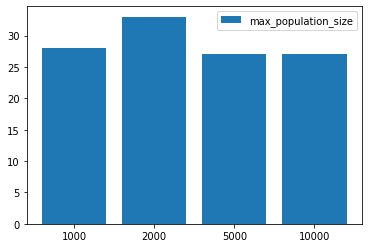

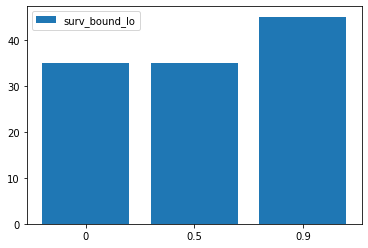

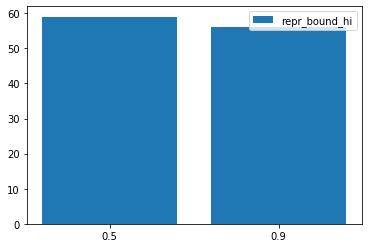

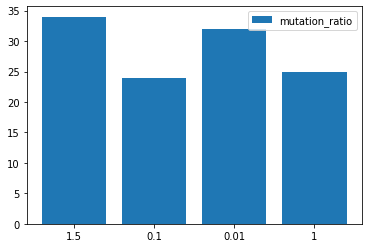

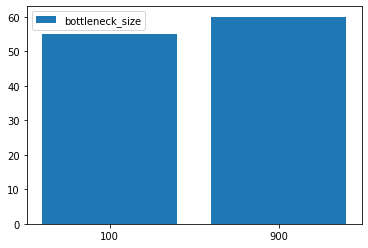

In [130]:
import matplotlib.pyplot as plt

print(ls)

for i,l in enumerate(ls):
    labels, ys = list(zip(*l))
    plt.bar(x=[str(_) for _ in labels] ,height=ys, label=meys[i])
    plt.legend()
    plt.show()

In [111]:
vals.shape, 4*3*2*4*2

((4, 3, 2, 4, 2), 192)

In [109]:
(vals == 2.).sum()

20

In [3]:
import collections

a = collections.namedtuple('qwer',list('abc'))

In [17]:
import numpy as np

x = np.random.randint(0,2,size=(1000,10,10))

np.quantile(x.sum(2),0.2,axis=1)

array([4. , 3. , 5. , 4.8, 2.8, 2.8, 3.8, 2. , 3.8, 3.8, 2. , 3.8, 4. ,
       3.8, 3. , 4. , 4.6, 3.8, 3. , 3. , 3. , 3.8, 3. , 5. , 3.8, 3.8,
       3.8, 2.6, 4. , 4.8, 4. , 4. , 3.8, 4. , 3.8, 3. , 4. , 3.8, 3. ,
       2. , 4. , 3.8, 4. , 3.8, 3.8, 3.8, 3. , 3.8, 4.8, 4. , 4. , 4. ,
       3.8, 3.8, 4.8, 3. , 3.6, 3. , 3.8, 3. , 4.8, 4. , 3.8, 5. , 3.6,
       3.8, 3. , 4. , 4.8, 4. , 3. , 5. , 4. , 2. , 3.8, 4.4, 3.8, 5. ,
       4. , 4. , 3.8, 3.8, 3. , 4.6, 3. , 4. , 4. , 3.8, 3.8, 3. , 4. ,
       3.8, 5. , 3. , 3.8, 3. , 4. , 3. , 3.8, 3.8, 4. , 4. , 3.8, 3. ,
       4.6, 3.8, 4. , 3.8, 4. , 4. , 3. , 4. , 3.8, 3.8, 4. , 2.8, 4.6,
       3. , 2.8, 3.8, 4. , 5. , 4. , 5. , 4. , 4. , 3.8, 4.6, 3.8, 4. ,
       3. , 3. , 4.8, 4.8, 4. , 3. , 3.8, 3.6, 4. , 3. , 3.8, 3. , 3. ,
       3.8, 4.8, 3.6, 3. , 5. , 4.8, 3. , 4. , 4. , 4.6, 3. , 4.8, 5. ,
       4.8, 3.8, 3. , 4.8, 3. , 3.8, 4.8, 3.8, 4.8, 5. , 3. , 4. , 4. ,
       3. , 2.8, 3.8, 3. , 3. , 3.6, 4.8, 3.8, 4. , 4.8, 3. , 3.

In [15]:
import config
config.load_config('config.yml')

import population

population.Population.a
# funcs.load_config('config.yml')
# print(funcs.config)

50

In [72]:
x = np.random.randint(0,2,(10,10))

1/2**np.sum(x,axis=1)

array([0.03125  , 0.125    , 0.25     , 0.0078125, 0.03125  , 0.0078125,
       0.0078125, 0.03125  , 0.015625 , 0.0078125])

In [63]:
x = np.arange(1,9)

# 1 / 2**x
np.log10(2**50)

15.05149978319906

In [37]:
import numpy as np

x = np.arange(100).reshape(10,10)

y = np.arange(10)

x[,y]


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (100,) (10,) 

In [42]:
%%timeit
x = np.random.random(size=10**7)

135 ms ± 827 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
%%timeit
y = np.random.choice([0,1],p=[0.5,0.5],size=10**8)

4.72 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import time
import pickle
import os

def save_pop(pop):
    filenames = [int(x) for x in os.listdir('pops')] + [0]
    filename = max(filenames)+1
    print(f"Saving to filename '{filename}'.")

    with open(f"pops/{filename}", "wb") as f:
        pickle.dump(pop, f)
    return filename

def load_pop(filename):
    with open(f"pops/{filename}","rb") as f:
        pop = pickle.load(f)
    return pop

In [77]:
from population import Population
from funcs import plot

def run(cycles=1000, filename=None):

    if filename:
        pop = load_pop(filename)
        flag = True
    else:
        pop = Population()
        flag = False

    i = 0
    while not flag:
        pop.cycle()
        flag = len(pop.genomes) > 1500
        if not i % 100:
            print(i, len(pop.genomes), sep='\t')
        i+=1


    if flag:
        for i in range(cycles):
            pop.cycle()
            if not i % 100:
                print(i, len(pop.genomes), sep='\t')

    return pop

In [81]:
# filename = None

# pop = run(
#     cycles=4000,
#     filename=filename,
# )
pickle_name = save_pop(pop)
plot(pop, pickle_name)

Saving to filename '14'.


PicklingError: Can't pickle <class 'population.Population'>: it's not the same object as population.Population

In [4]:
import collections
import yaml

with open('config.yml','r') as f:
    d = yaml.load(f)
    config = collections.namedtuple("config", d.keys())(*d.values())

In [22]:
# test if mutation rate 1 with genomes 50% is stable

import numpy as np

maturation_age = 5
reproducing_age = 10

sp = 0.5
rp = 0.5

def genomic_fitness(maturation_age, reproducing_age, sp, rp):
    return sum(
        rp * sp**(i+maturation_age)
        for i in range(reproducing_age)
    )

genomic_fitness(
    maturation_age,
    reproducing_age,
    sp,
    rp
)

0.031219482421875

In [1]:
import numpy as np
# points = np.linspace(0,1,10)
# sp = np.meshgrid(*[np.linspace(0.4,0.6,3,dtype=np.float32)]*15)

In [4]:
rez = np.zeros(shape=(4,)*15,dtype=np.float32)

In [15]:
import itertools
points = (0.4,0.5,0.6,0.9)
coords = (0,1,2,3)

c = 0

total = 4**15

def genomic_fitness(genome):
    surv = np.prod(genome[:5])
    res = surv
    for i in r

file = open('values.txt', 'w')

for i, vs in enumerate(itertools.product(*[points]*15)):



    if not i % 1000000:
        print(i/total)

    


1000000 0.0009313225746154785 1073741824
2000000 0.001862645149230957 1073741824
3000000 0.0027939677238464355 1073741824
4000000 0.003725290298461914 1073741824
5000000 0.004656612873077393 1073741824
6000000 0.005587935447692871 1073741824
7000000 0.00651925802230835 1073741824
8000000 0.007450580596923828 1073741824
9000000 0.008381903171539307 1073741824
10000000 0.009313225746154785 1073741824
11000000 0.010244548320770264 1073741824
12000000 0.011175870895385742 1073741824
13000000 0.01210719347000122 1073741824
14000000 0.0130385160446167 1073741824
15000000 0.013969838619232178 1073741824
16000000 0.014901161193847656 1073741824
17000000 0.015832483768463135 1073741824
18000000 0.016763806343078613 1073741824
19000000 0.017695128917694092 1073741824
20000000 0.01862645149230957 1073741824
21000000 0.01955777406692505 1073741824
22000000 0.020489096641540527 1073741824
23000000 0.021420419216156006 1073741824
24000000 0.022351741790771484 1073741824
25000000 0.023283064365386963

KeyboardInterrupt: 